# Tutorial de visualización de imágenes

Para esta tarea utilizaremos Basemap de matplotlib toolkits. La instalación puede ser un poco engorrosa, la forma que a mi me funcionó fue usando pip, con el link del github, así:
pip3 install https://github.com/matplotlib/basemap/archive/master.zip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pyproj import Proj
from netCDF4 import Dataset

## 1. Leer datos de la imagen

In [2]:
# Lo de siempre, pero voy a leer la imagen cortada del ejemplo anterior
dataset = Dataset('TPW_20200512-1700.nc')

In [3]:
dataset.variables.keys()

dict_keys(['y', 'x', 'TPW', 'goes_imager_projection'])

In [4]:
dataset.variables['TPW']

<class 'netCDF4._netCDF4.Variable'>
int16 TPW(y, x)
    _FillValue: -1
    long_name: ABI L2+ Total Precipitable Water
    standard_name: lwe_thickness_of_atmosphere_mass_content_of_water_vapor
    _Unsigned: true
    valid_range: [ 0 -6]
    scale_factor: 0.00152602
    add_offset: 0.0
    units: mm
    resolution: y: 0.000280 rad x: 0.000280 rad
    coordinates: latitude retrieval_local_zenith_angle quantitative_local_zenith_angle solar_zenith_angle t y x
    grid_mapping: goes_imager_projection
    cell_methods: latitude: point (good quality pixel produced) retrieval_local_zenith_angle: point (good or degraded quality pixel produced) quantitative_local_zenith_angle: point (good quality pixel produced) solar_zenith_angle: point (good quality pixel produced) t: point area: point
    ancillary_variables: DQF_Overall DQF_Retrieval DQF_SkinTemp
unlimited dimensions: 
current shape = (324, 314)
filling on

In [10]:
dataset.variables['TPW'][:]

masked_array(
  data=[[--, --, 36.1651496887207, ..., --, --, 36.072059631347656],
        [--, --, 35.85689163208008, ..., --, --, --],
        [32.35772705078125, 34.30950927734375, 35.252586364746094, ...,
         --, --, --],
        ...,
        [24.99315643310547, 24.967212677001953, --, ..., --, --, --],
        [24.887859344482422, 24.881755828857422, --, ..., --, --, --],
        [24.48041343688965, 24.600969314575195, 24.689477920532227, ...,
         --, --, --]],
  mask=[[ True,  True, False, ...,  True,  True, False],
        [ True,  True, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False,  True, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=65535,
  dtype=float32)

### Algunas variables ya conocidas:

In [5]:
# Altura de la órbita del satélite
sat_h= dataset.variables['goes_imager_projection'].perspective_point_height

# Longitud geográfica de la órbita del satélite
sat_lon = dataset.variables['goes_imager_projection'].longitude_of_projection_origin

# Dirección en que se hace el barrido
sat_sweep = dataset.variables['goes_imager_projection'].sweep_angle_axis

# Leo las coordenadas en la imagen. 
# Son generadas con una proyección geo-estacionaria

X = dataset.variables['x'][:]
Y = dataset.variables['y'][:]
TPW = dataset.variables['TPW'][:]

### Definimos el mapa y graficamos

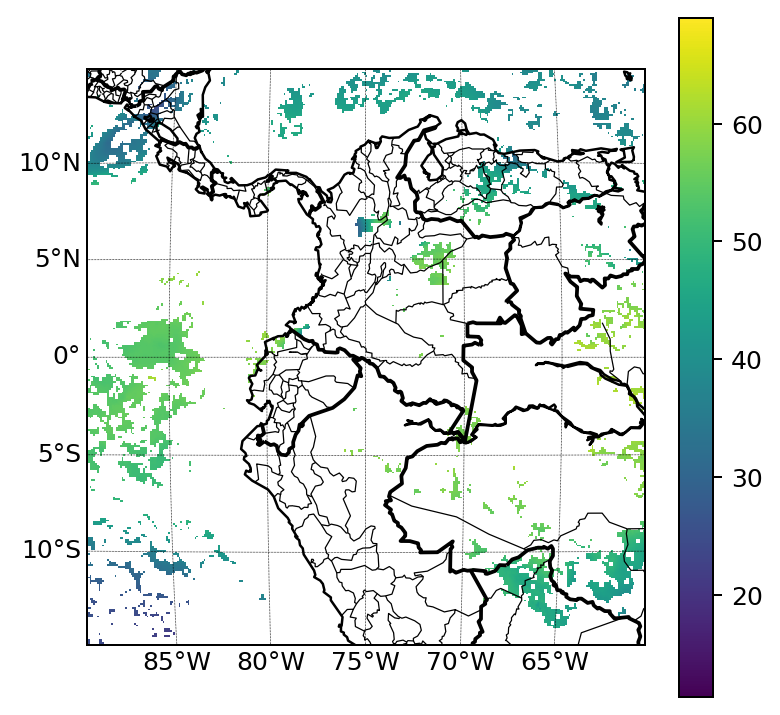

In [36]:
# Abrimos la figura
fig = plt.figure(figsize=(5,5),dpi=180)

# Usamos basemap para crear el mapa.
# Note que las coordenadas limite están multiplicadas por la altura del satelite
# En algunas versiones de Basemap no es necesario definir rsphere
m = Basemap(resolution='l', projection='geos', lon_0=sat_lon,
            llcrnrx=X.min()*sat_h, llcrnry=Y.min()*sat_h, rsphere=(6378137.00,6356752.3142), 
            urcrnrx=X.max()*sat_h, urcrnry=Y.max()*sat_h)

#im = m.imshow(TPW,origin='upper',cmap='Blues_r')

# Utilizaremos la paleta de colores "viridis" para poder diferenciar los datos perdidos de los otros
# Para ello tambien definimos un vmax
im = m.imshow(TPW,origin='upper',cmap='viridis',vmax=np.ceil(TPW.max()))
m.drawcoastlines()
m.drawcountries(linewidth=1.5)
m.drawstates()
m.drawparallels(np.arange(-10,15,5),linewidth=0.3, 
                color='black',labels=[True,False,False,True])
m.drawmeridians(np.arange(-85,-60,5),linewidth=0.3, 
                color='black',labels=[True,False,False,True])
plt.colorbar()
plt.show()
plt.close()

Puede usar otra paleta; en el siguiente link encuentra las disponibles: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Vemos que esta imagen en particular tiene muchos datos perdidos (color blanco).